In [29]:
# train base model
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
from module.dataloader import create_generators

data_dir = "data/"
train_gen, val_gen = create_generators(
    data_dir,
    img_size=(224, 224),
    batch_size=16,
    val_split=0.2,
    augment=False
)

# Training pass logic
history = model.fit(
    train_gen,
    epochs=5,
    validation_data=val_gen,
    steps_per_epoch=5,       
    validation_steps=5       
)

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5905 - loss: 0.7886 - val_accuracy: 1.0000 - val_loss: 0.0262
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 720ms/step - accuracy: 0.9587 - loss: 0.0797 - val_accuracy: 0.9750 - val_loss: 0.0679
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 704ms/step - accuracy: 0.9898 - loss: 0.0429 - val_accuracy: 0.9875 - val_loss: 0.0328
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 675ms/step - accuracy: 0.9743 - loss: 0.0847 - val_accuracy: 1.0000 - val_loss: 4.7355e-04
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 708ms/step - accuracy: 0.9639 - loss: 0.3087 - val_accuracy: 0.9875 - val_loss: 0.0906


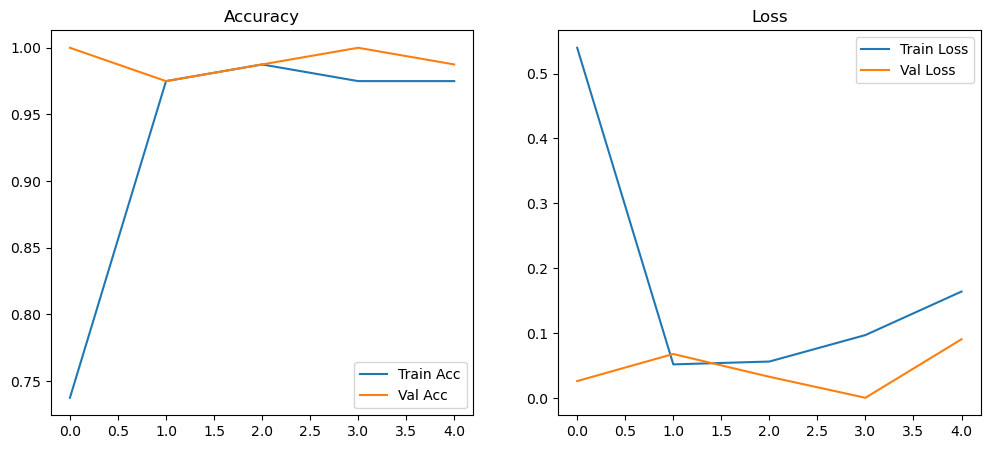

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [32]:
model.save("models/basemodel.keras")

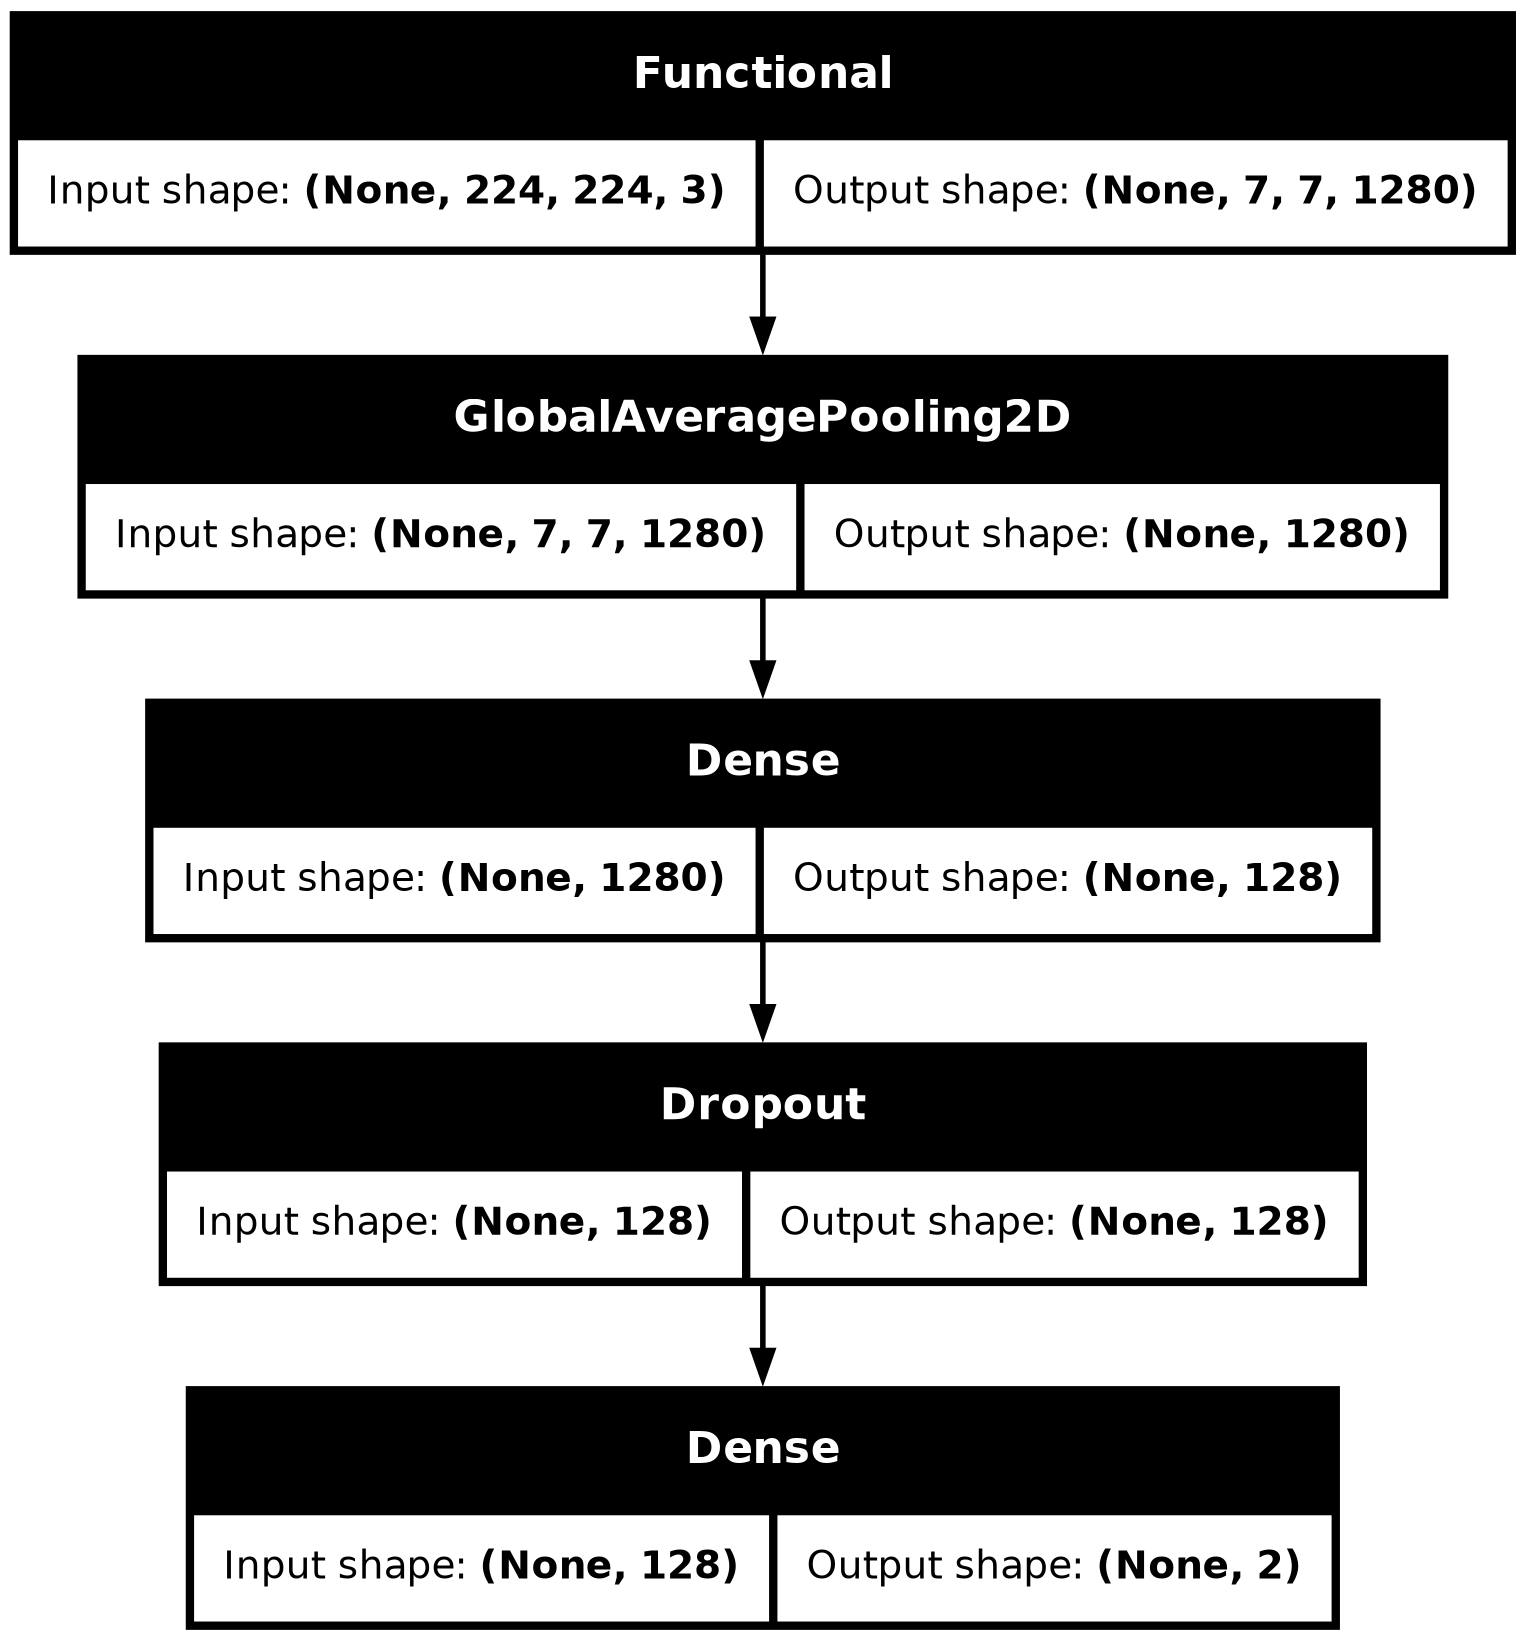

In [46]:
from tensorflow import keras
from IPython.display import Image, display

# Output model architecture
keras.utils.plot_model(model, show_shapes=True, to_file="models/basemodel.png")
display(Image(filename="models/basemodel.png", width=450))  

In [ ]:
# end of base model build